In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess
import time

%matplotlib inline

In [2]:
df = pd.read_csv('NursingData_clean.csv')

In [3]:
df.head()

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
0,0,2015-06-21 01:17:09,2015,6,Late night,0.00,1.3,0,1.30,NaN,NaN
1,1,2015-06-21 02:00:39,2015,6,Late night,7.52,0.0,0,7.52,NaN,NaN
2,2,2015-06-21 02:37:57,2015,6,Late night,14.50,0.0,0,14.50,NaN,NaN
3,3,2015-06-21 05:23:55,2015,6,Late night,0.00,20.0,0,20.00,NaN,NaN
4,4,2015-06-21 05:47:59,2015,6,Late night,22.18,0.0,0,22.18,NaN,NaN


In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 3266
Data columns (total 11 columns):
Unnamed: 0    3267 non-null int64
time          3267 non-null datetime64[ns]
Year          3267 non-null int64
Month         3267 non-null int64
TimeofDay     3267 non-null object
LeftFeed      2560 non-null float64
RightFeed     2560 non-null float64
BotFeed       3267 non-null float64
TotalFeed     2560 non-null float64
BotAmt        77 non-null float64
Sleep         674 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 306.3+ KB


# Plotting eat/sleep periods for one day

In [6]:
#creating dummy df
date = '1/22/2016'
#for date string listed, parse into dt format 
parsed = dt.datetime.strptime(date,'%m/%d/%Y')
#create date range for index
dateind = pd.date_range(date, periods=1440, freq='min')

ts = pd.DataFrame(np.zeros((len(dateind),2)),columns=['Eat','Sleep'],index=dateind)

In [7]:
#cleaner new way to do it
for i,dtinfo in enumerate(df.time):
    if dtinfo.date() == parsed.date():
        eatsleep = ''
        if df.TotalFeed[i] > 0:
            eatsleep = 'e'
            intmin = int(df.TotalFeed[i])#don't care about seconds
            endtime = dtinfo + dt.timedelta(minutes = intmin)
        if df.Sleep[i] > 0:
            eatsleep = 's'
            inthrs = int(df.Sleep[i])
            intmin = int((df.Sleep[i]-inthrs)*60)
            endtime = dtinfo + dt.timedelta(hours = inthrs, minutes = intmin)
        for j,timebymin in enumerate(ts.index):
            if dtinfo.time() < timebymin.time() and timebymin.time() <= endtime.time():
                if eatsleep == 'e':
                    ts.Eat[j] = 1
                if eatsleep == 's':
                    ts.Sleep[j] = 1

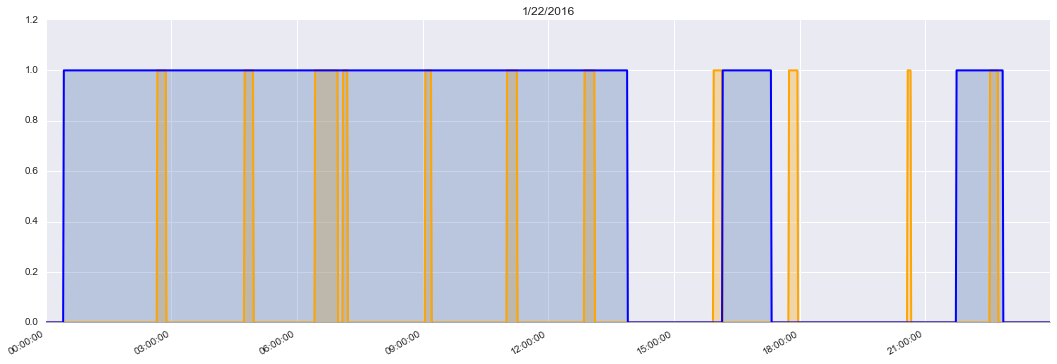

In [8]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.plot(ts.index,ts.Eat,'orange',linewidth=2)
ax.fill_between(ts.index, 0, ts.Eat,alpha=0.3,facecolor='orange')
ax.plot(ts.index,ts.Sleep,'b',linewidth=2)
ax.fill_between(ts.index,0, ts.Sleep,alpha=0.3)
ax.set_ylim(0,1.2)
ax.set_title(date)
fig.autofmt_xdate()

In [9]:
#eventually...
ts.resample('5min',how='sum',closed='left',label='left')

,Eat,Sleep
2016-01-22 00:00:00,0,0
2016-01-22 00:05:00,0,0
2016-01-22 00:10:00,0,0
2016-01-22 00:15:00,0,0
2016-01-22 00:20:00,0,0
2016-01-22 00:25:00,0,4
2016-01-22 00:30:00,0,5
2016-01-22 00:35:00,0,5
2016-01-22 00:40:00,0,5
2016-01-22 00:45:00,0,5


# For all days

In [10]:
#create array for index
timeind = pd.date_range("00:00", "23:59", freq='min').time
#create date, eat/sleep arrays for multiIndex
totarr = pd.Series(d.date() for d in df.time)
datearr = totarr.unique()
dateind = []
for d in datearr:
    dateind.append(d)
    dateind.append(d)
esarr = ['Eat','Sleep']*len(datearr)
arrays = [dateind,esarr]

ts = pd.DataFrame(np.zeros((len(timeind),len(dateind))),index=timeind,columns=arrays)
ts.head()

2015-06-21       2015-06-22       2015-06-23       2015-06-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          0     0          0     0          0     0   
00:01:00          0     0          0     0          0     0          0     0   
00:02:00          0     0          0     0          0     0          0     0   
00:03:00          0     0          0     0          0     0          0     0   
00:04:00          0     0          0     0          0     0          0     0   

         2015-06-25        ...  2016-01-23       2016-01-24       2016-01-25  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          0     0  ...           0     0          0     0          0   
00:01:00          0     0  ...           0     0          0     0          0   
00:02:00          0     0  ...           0     0          0     0          0   
00:03:00          0     0  ...           0     0          0     0          0   
00:04:00          0     0  ...           0     0          0     0          0   

               2016-01-26       2015-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          0     0          0     0  
00:01:00     0          0     0          0     0  
00:02:00     0          0     0          0     0  
00:03:00     0          0     0          0     0  
00:04:00     0          0     0          0     0  

[5 rows x 442 columns]

In [11]:
ts.index

Index([00:00:00, 00:01:00, 00:02:00, 00:03:00, 00:04:00, 00:05:00, 00:06:00,
       00:07:00, 00:08:00, 00:09:00,
       ...
       23:50:00, 23:51:00, 23:52:00, 23:53:00, 23:54:00, 23:55:00, 23:56:00,
       23:57:00, 23:58:00, 23:59:00],
      dtype='object', length=1440)

In [12]:
len(df.time)

3267

In [13]:
#cleaner new way to do it

#for each entry in original data, either an eat or a sleep
for i,dtinfo in enumerate(df.time):
    print(dtinfo)
    eatsleep = ''
    if df.TotalFeed[i] > 0:
        eatsleep = 'e'
        intmin = int(df.TotalFeed[i])#don't care about seconds
        endtime = dtinfo + dt.timedelta(minutes = intmin)
    if df.Sleep[i] > 0:
        eatsleep = 's'
        inthrs = int(df.Sleep[i])
        intmin = int((df.Sleep[i]-inthrs)*60)
        endtime = dtinfo + dt.timedelta(hours = inthrs, minutes = intmin)

    for dates in datearr:
#        print(len(ts.index),dates,dtinfo.date())
        #find matching date
        if dtinfo.date() == dates:            
#            print(len(ts.index),endtime)
            #go through times on that date, set appropriate toggles
            for timebymin in ts.index:
#                print(dtinfo.time(),timebymin,endtime.time())
                if dtinfo.time() < timebymin and timebymin <= endtime.time():
                    if eatsleep == 'e':
                        ts.loc[timebymin,(dates,'Eat')]=1
#                    ts[dates]['Eat'][timebymin] = 1
                    if eatsleep == 's':
                        ts.loc[timebymin,(dates,'Sleep')]=1
#                    ts[dates]['Sleep'][timebymin] = 1

2015-06-21 01:17:09
2015-06-21 02:00:39
2015-06-21 02:37:57
2015-06-21 05:23:55
2015-06-21 05:47:59
2015-06-21 06:24:35
2015-06-21 07:50:08
2015-06-21 08:44:12
2015-06-21 09:48:26
2015-06-21 10:46:21
2015-06-21 11:13:51
2015-06-21 11:58:37
2015-06-21 15:05:44
2015-06-21 16:30:33
2015-06-21 18:12:37
2015-06-21 21:31:23
2015-06-21 23:14:22
2015-06-21 23:59:14
2015-06-22 01:30:31
2015-06-22 01:53:45
2015-06-22 02:55:56
2015-06-22 03:18:23
2015-06-22 04:02:48
2015-06-22 06:38:09
2015-06-22 07:33:03
2015-06-22 09:12:34
2015-06-22 09:32:06
2015-06-22 10:11:36
2015-06-22 11:07:19
2015-06-22 12:22:05
2015-06-22 13:38:40
2015-06-22 15:00:42
2015-06-22 16:27:02
2015-06-22 17:42:17
2015-06-22 18:53:32
2015-06-22 21:14:43
2015-06-22 22:27:36
2015-06-22 23:41:42
2015-06-23 00:21:07
2015-06-23 01:53:00
2015-06-23 05:00:55
2015-06-23 06:09:07
2015-06-23 07:52:03
2015-06-23 08:13:37
2015-06-23 08:44:04
2015-06-23 09:50:53
2015-06-23 13:00:00
2015-06-23 14:57:40
2015-06-23 16:00:43
2015-06-23 17:15:00


In [14]:
ts.iloc[120:130,10:20]

2015-06-26       2015-06-27       2015-06-28       2015-06-29        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
02:00:00          0     0          0     0          0     0          1     0   
02:01:00          0     0          0     0          0     0          1     0   
02:02:00          0     0          0     0          0     0          1     0   
02:03:00          0     0          0     0          0     0          1     0   
02:04:00          1     0          0     0          0     0          1     0   
02:05:00          1     0          0     0          0     0          1     0   
02:06:00          1     0          0     0          0     0          1     0   
02:07:00          1     0          0     0          0     0          1     0   
02:08:00          1     0          0     0          0     0          1     0   
02:09:00          1     0          0     0          0     0          1     0   

         2015-06-30        
                Eat Sleep  
02:00:00          0     0  
02:01:00          0     0  
02:02:00          0     0  
02:03:00          0     0  
02:04:00          0     0  
02:05:00          0     0  
02:06:00          0     0  
02:07:00          0     0  
02:08:00          0     0  
02:09:00          0     0

In [15]:
eats = ts.xs('Eat',level=1,axis=1)
eats.head()

,2015-06-21 00:00:00,2015-06-22 00:00:00,2015-06-23 00:00:00,2015-06-24 00:00:00,2015-06-25 00:00:00,2015-06-26 00:00:00,2015-06-27 00:00:00,2015-06-28 00:00:00,2015-06-29 00:00:00,2015-06-30 00:00:00,...,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2015-05-31 00:00:00
00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
xtime = [int(x.hour)+int(x.minute)/60 for x in ts.index]
xtime[:5]

[0.0, 0.016666666666666666, 0.03333333333333333, 0.05, 0.06666666666666667]

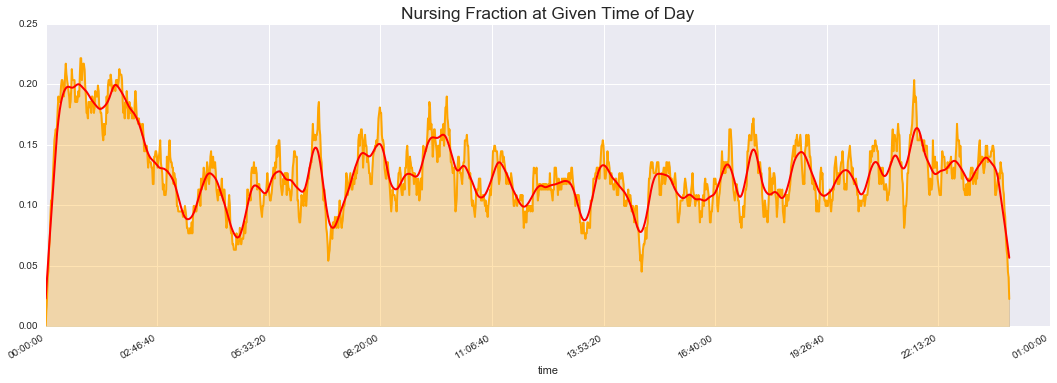

In [17]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(ts.index,eats.sum(axis=1)/len(datearr),'orange',linewidth=2)
ax.fill_between(ts.index, 0, eats.sum(axis=1)/len(datearr),alpha=0.3,facecolor='orange')
filtered = lowess(eats.sum(axis=1)/len(datearr), xtime, is_sorted=True, frac=0.025, it=0)
ax.plot(ts.index, filtered[:,1], 'r',linewidth=2)
#ax.set_ylim(0,1.2)
ax.set_title('Nursing Fraction at Given Time of Day',fontsize='xx-large')
fig.autofmt_xdate()

In [18]:
filtered[:5]

array([[ 0.        ,  0.02301362],
       [ 0.01666667,  0.03161603],
       [ 0.03333333,  0.04014151],
       [ 0.05      ,  0.04858771],
       [ 0.06666667,  0.05695421]])

In [19]:
sleeps = ts.xs('Sleep',level=1,axis=1)

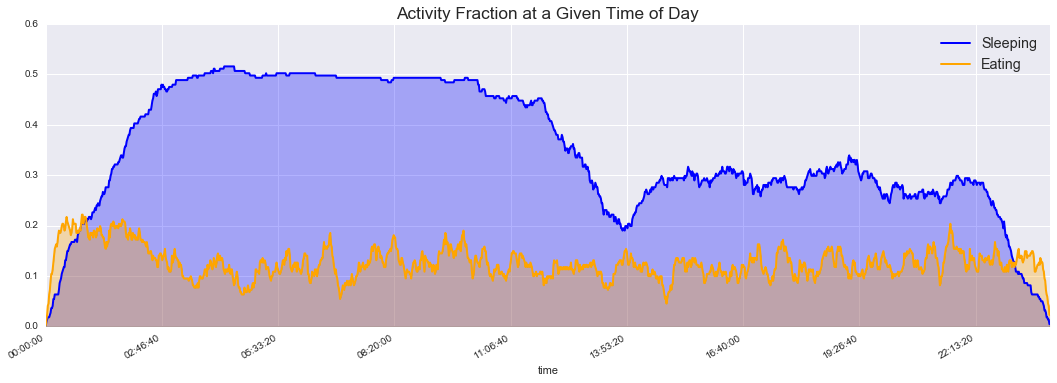

In [20]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(ts.index,sleeps.sum(axis=1)/len(datearr),'b',linewidth=2,label='Sleeping')
ax.fill_between(ts.index, 0, sleeps.sum(axis=1)/len(datearr),alpha=0.3,facecolor='b')
ax.plot(ts.index,eats.sum(axis=1)/len(datearr),'orange',linewidth=2,label='Eating')
ax.fill_between(ts.index, 0, eats.sum(axis=1)/len(datearr),alpha=0.3,facecolor='orange')
#filtered = lowess(sleeps.sum(axis=1)/len(datearr), xtime, is_sorted=True, frac=0.025, it=0)
#ax.plot(ts.index, filtered[:,1], 'r',linewidth=2)
ax.set_xlim(0,'23:59:59')
ax.set_title('Activity Fraction at a Given Time of Day',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.autofmt_xdate()

In [21]:
idx = pd.IndexSlice
nov = ts.loc[:,idx['2015-06-26','Eat']]
nov[:5]

00:00:00    0
00:01:00    0
00:02:00    0
00:03:00    0
00:04:00    0
Name: (2015-06-26 00:00:00, Eat), dtype: float64

In [47]:
monthnum = 1
motxt = time.strftime('%B',time.strptime(str(monthnum),'%m'))
mocheck = ts.columns.levels[0].month == monthnum
moflag = []
for ans in mocheck:
    moflag.append(ans)
    moflag.append(ans)

onemo = ts.loc[:,moflag]
onemo.head()

2016-01-02       2016-01-03       2016-01-04       2016-01-05        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          0     0          0     0          0     0   
00:01:00          0     0          0     0          0     0          0     0   
00:02:00          0     0          0     0          0     0          0     0   
00:03:00          1     0          0     0          0     0          0     0   
00:04:00          1     0          0     0          0     0          0     0   

         2016-01-06        ...  2016-01-23       2016-01-24       2016-01-25  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          0     0  ...           0     0          0     0          0   
00:01:00          0     0  ...           0     0          0     0          0   
00:02:00          0     0  ...           0     0          0     0          0   
00:03:00          0     0  ...           0     0          0     0          0   
00:04:00          0     0  ...           0     0          0     0          0   

               2016-01-26       2015-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          0     0          0     0  
00:01:00     0          0     0          0     0  
00:02:00     0          0     0          0     0  
00:03:00     0          0     0          0     0  
00:04:00     0          0     0          0     0  

[5 rows x 52 columns]

In [48]:
sleepy = onemo.xs('Sleep',level=1,axis=1).sum(axis=1)/len(onemo)
eaty = onemo.xs('Eat',level=1,axis=1).sum(axis=1)/len(onemo)

In [69]:
print(max(eaty),max(sleepy))
max(max(eaty+sleepy)

0.00763888888889 0.0152777777778


0.022916666666666665

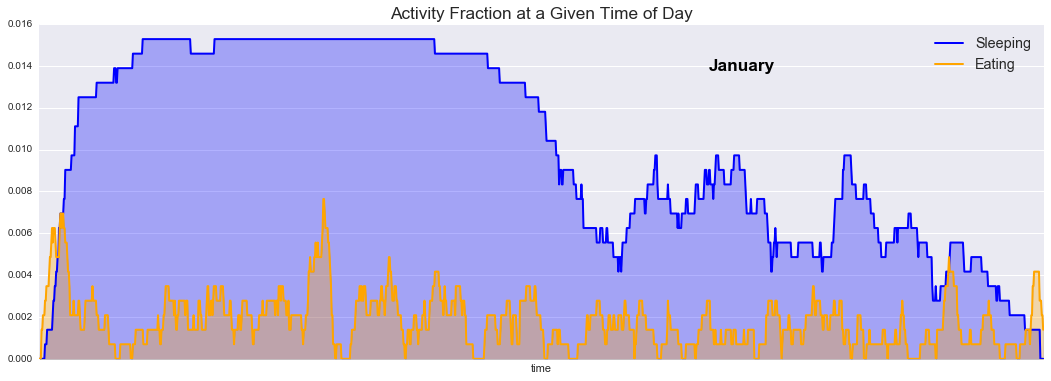

In [80]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(ts.index,sleepy,'b',linewidth=2,label='Sleeping')
ax.fill_between(ts.index, 0, sleepy,alpha=0.3,facecolor='b')
ax.plot(ts.index,eaty,'orange',linewidth=2,label='Eating')
ax.fill_between(ts.index, 0, eaty,alpha=0.3,facecolor='orange')
#filtered = lowess(sleeps.sum(axis=1)/len(datearr), xtime, is_sorted=True, frac=0.025, it=0)
#ax.plot(ts.index, filtered[:,1], 'r',linewidth=2)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(0,'23:59:59')
ax.set_title('Activity Fraction at a Given Time of Day',fontsize='xx-large')
ax.text('16:00',max(max(eaty),max(sleepy))*0.9,motxt,fontsize='xx-large',color='k',fontweight='bold')
ax.legend(fontsize='x-large')
#fig.autofmt_xdate()